In [85]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/athletes.csv')

In [86]:
# if using git lfs, need to run `git lfs pull` if data is not already downloaded from lfs server
df.head()

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,snatch,deadlift,backsq,pullups,eat,train,background,experience,schedule,howlong
0,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,...,NaN,400.0,305.0,NaN,NaN,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|I r...,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|,4+ years|
1,3517.0,Derek Abdella,NaN,NaN,NaN,Male,42.0,70.0,190.0,NaN,...,NaN,NaN,NaN,NaN,NaN,I have a coach who determines my programming|I...,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|,4+ years|
2,4691.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5164.0,Abo Brandon,Southern California,LAX CrossFit,LAX CrossFit,Male,40.0,67.0,NaN,211.0,...,200.0,375.0,325.0,25.0,I eat 1-3 full cheat meals per week|,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|,4+ years|
4,5286.0,Bryce Abbey,NaN,NaN,NaN,Male,32.0,65.0,149.0,206.0,...,150.0,NaN,325.0,50.0,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|I inc...,I played college sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|I strictly s...,1-2 years|


In [87]:
# Check types
df.dtypes

athlete_id    float64
name           object
region         object
team           object
affiliate      object
gender         object
age           float64
height        float64
weight        float64
fran          float64
helen         float64
grace         float64
filthy50      float64
fgonebad      float64
run400        float64
run5k         float64
candj         float64
snatch        float64
deadlift      float64
backsq        float64
pullups       float64
eat            object
train          object
background     object
experience     object
schedule       object
howlong        object
dtype: object

In [88]:
# row counts
len(df)

423006

# NAs in each column

In [89]:
# Count NaN values in each column
nan_counts = df.isna().sum()

nan_counts

athlete_id         3
name           91896
region        171744
team          267846
affiliate     181090
gender         91896
age            91896
height        263137
weight        193116
fran          367580
helen         392727
grace         382261
filthy50      403647
fgonebad      393268
run400        400760
run5k         386909
candj         318571
snatch        325726
deadlift      307683
backsq        312489
pullups       372398
eat           329074
train         317175
background    324061
experience    318070
schedule      325131
howlong       313800
dtype: int64

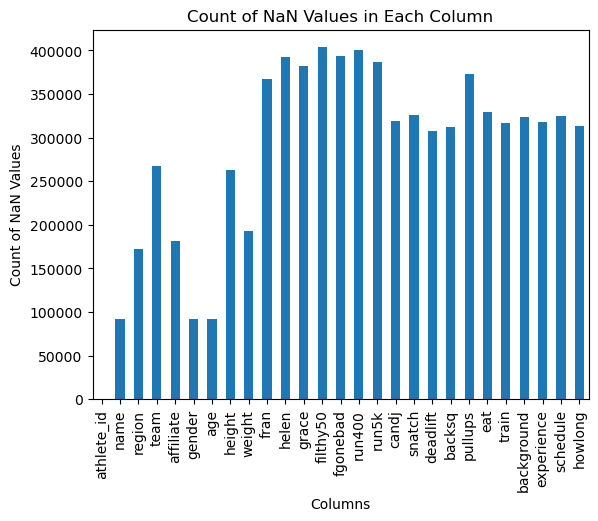

In [90]:
# Create a bar chart
nan_counts.plot(kind='bar')
plt.title('Count of NaN Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Count of NaN Values')
plt.show()

In [91]:
# category columns
cats = ['gender', 'eat', 'background', 'experience', 'schedule', 'howlong']

# numeric columns
numcs = ['age','height','weight','candj','snatch','deadlift','backsq']

# Category columns

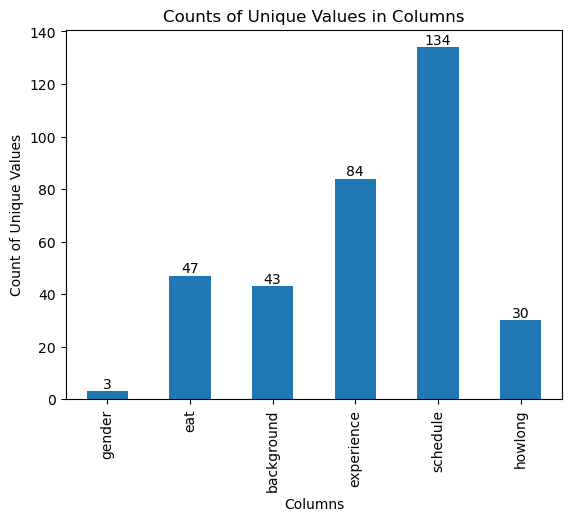

In [92]:
# Count unique values in certain categorical columns
unique_value_counts = df[cats].nunique()

# Create a bar chart
ax = unique_value_counts.plot(kind='bar')
plt.title('Counts of Unique Values in Columns')
plt.xlabel('Columns')
plt.ylabel('Count of Unique Values')

# Display numbers on top of each bar
for i, v in enumerate(unique_value_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.show()

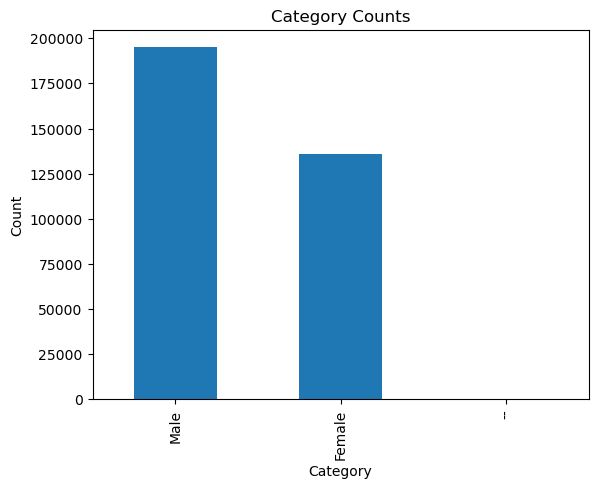

In [93]:
# gender
def category_counts(data,cat):
    # Count category occurrences
    category = data[cat].value_counts()

    # Create a bar chart for category counts
    category.plot(kind='bar')
    plt.title('Category Counts')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.show()

category_counts(df,'gender')

# Numeric columns

In [94]:
df[numcs].describe().round(2)

,age,height,weight,candj,snatch,deadlift,backsq
count,331110.00,159869.00,229890.00,104435.00,97280.00,115323.00,110517.00
mean,32.52,120.62,170.90,270.91,242.50,697.05,585.21
std,7.73,20979.95,58.38,25968.82,27089.42,55232.35,50529.76
min,13.00,0.00,1.00,-45.00,0.00,-500.00,-7.00
25%,27.00,66.00,145.00,140.00,105.00,255.00,205.00
50%,31.00,69.00,170.00,195.00,145.00,345.00,275.00
75%,37.00,72.00,192.00,235.00,185.00,415.00,335.00
max,125.00,8388607.00,20175.00,8388607.00,8388607.00,8388607.00,8388607.00


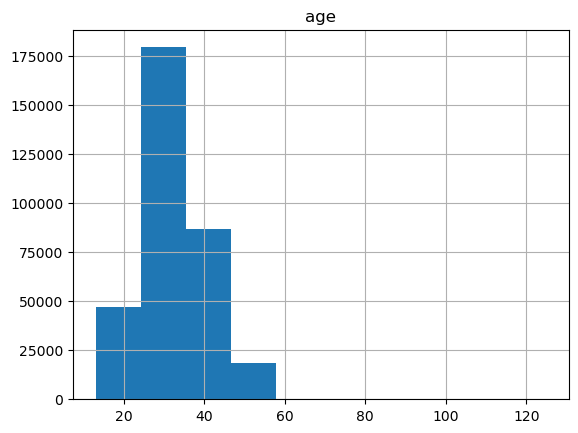

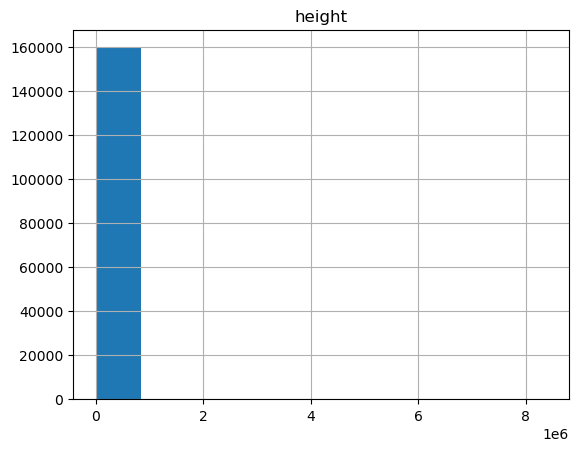

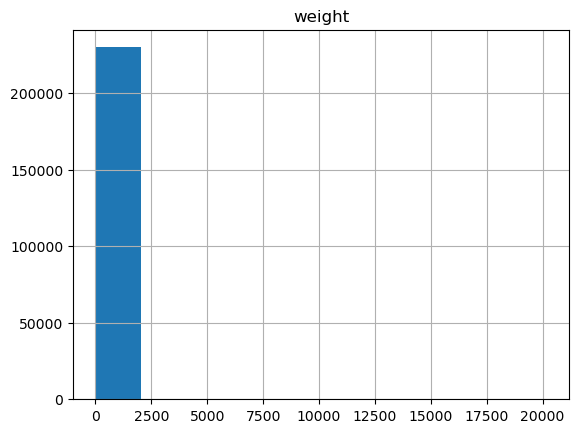

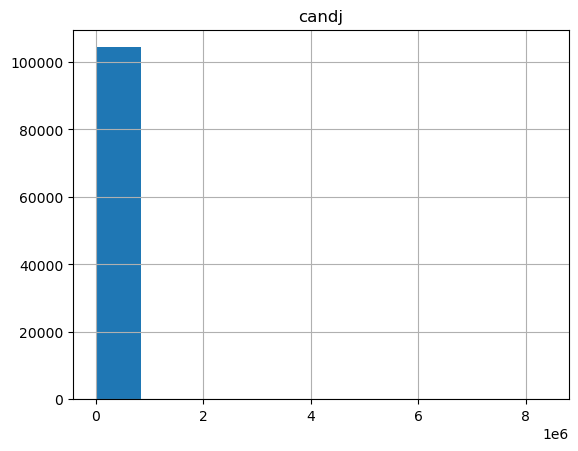

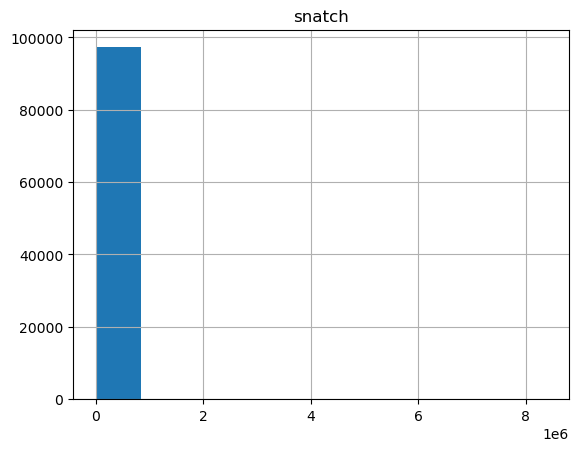

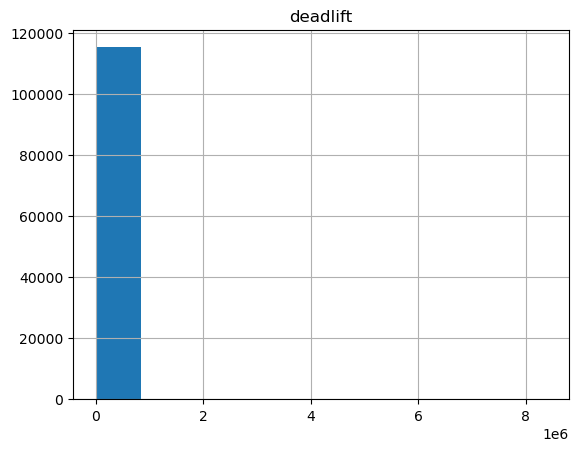

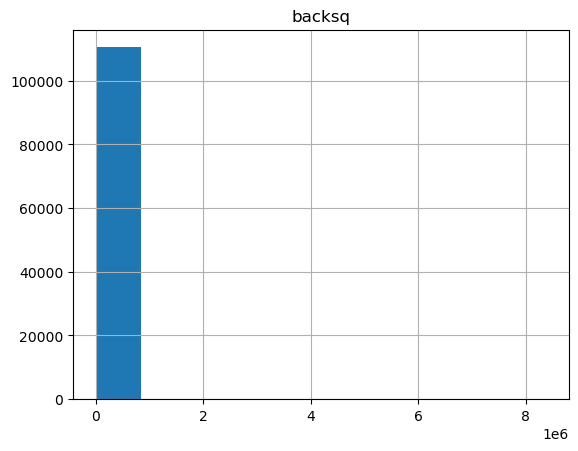

In [95]:
# Create histograms for multiple columns
for i in numcs:
    df.hist(column=i)

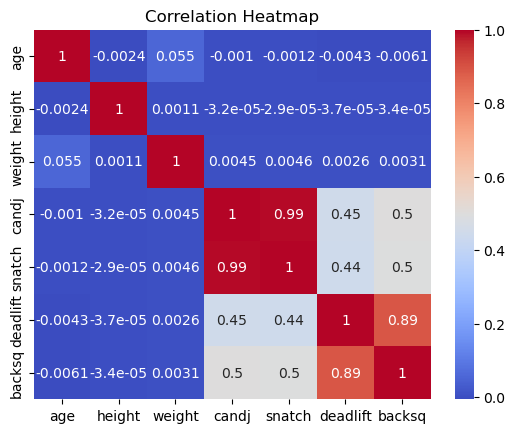

In [96]:
import seaborn as sns
corr_matrix = df[numcs].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Response variable

In [97]:
# must create total_lift variable
df['total_lift'] = df['candj'] + df['snatch'] + df['deadlift'] +df['backsq']

In [98]:
df['total_lift'].describe().round(2)

count       85191.00
mean         2061.06
std        154845.98
min           -22.00
25%           733.00
50%           985.00
75%          1185.00
max      33554428.00
Name: total_lift, dtype: float64

# Export data

In [99]:
fin = df[cats+numcs+['total_lift']]
fin.head()

,gender,eat,background,experience,schedule,howlong,age,height,weight,candj,snatch,deadlift,backsq,total_lift
0,Male,NaN,I played youth or high school level sports|I r...,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|,4+ years|,24.0,70.0,166.0,220.0,NaN,400.0,305.0,NaN
1,Male,NaN,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|,4+ years|,42.0,70.0,190.0,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Male,I eat 1-3 full cheat meals per week|,I played youth or high school level sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|,4+ years|,40.0,67.0,NaN,245.0,200.0,375.0,325.0,1145.0
4,Male,I eat quality foods but don't measure the amount|,I played college sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|I strictly s...,1-2 years|,32.0,65.0,149.0,205.0,150.0,NaN,325.0,NaN


In [100]:
fin.to_csv('../data/athletes_fin.csv')